[INFO] Dataset directory created.
[INFO] Image dataset ready.
[INFO] Captions dataset ready.
[INFO] Captions DataFrame created.
[INFO] Captions tokenized and padded.
[INFO] Dataset split: Train=6472, Val=809, Test=810
[INFO] DataLoader created.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[INFO] Model created on device: cuda


Epoch [1/15]: 100%|██████████| 203/203 [00:19<00:00, 10.39it/s, loss=4.41]


Epoch 1/15, Train Loss: 5.0956, Val Loss: 4.2918


Epoch [2/15]: 100%|██████████| 203/203 [00:19<00:00, 10.58it/s, loss=3.14]


Epoch 2/15, Train Loss: 4.0526, Val Loss: 3.8778


Epoch [3/15]: 100%|██████████| 203/203 [00:19<00:00, 10.50it/s, loss=3.38]


Epoch 3/15, Train Loss: 3.7650, Val Loss: 3.6572


Epoch [4/15]: 100%|██████████| 203/203 [00:19<00:00, 10.45it/s, loss=3.43]


Epoch 4/15, Train Loss: 3.5553, Val Loss: 3.5610


Epoch [5/15]: 100%|██████████| 203/203 [00:19<00:00, 10.63it/s, loss=3.45]


Epoch 5/15, Train Loss: 3.4272, Val Loss: 3.5062


Epoch [6/15]: 100%|██████████| 203/203 [00:19<00:00, 10.52it/s, loss=3.62]


Epoch 6/15, Train Loss: 3.3065, Val Loss: 3.3993


Epoch [7/15]: 100%|██████████| 203/203 [00:19<00:00, 10.56it/s, loss=3.13]


Epoch 7/15, Train Loss: 3.2256, Val Loss: 3.3233


Epoch [8/15]: 100%|██████████| 203/203 [00:19<00:00, 10.63it/s, loss=2.8] 


Epoch 8/15, Train Loss: 3.1177, Val Loss: 3.3056


Epoch [9/15]: 100%|██████████| 203/203 [00:19<00:00, 10.57it/s, loss=3.17]


Epoch 9/15, Train Loss: 3.0717, Val Loss: 3.2263


Epoch [10/15]: 100%|██████████| 203/203 [00:18<00:00, 10.71it/s, loss=2.57]


Epoch 10/15, Train Loss: 3.0207, Val Loss: 3.2029


Epoch [11/15]: 100%|██████████| 203/203 [00:19<00:00, 10.21it/s, loss=2.74]


Epoch 11/15, Train Loss: 2.9502, Val Loss: 3.1495


Epoch [12/15]: 100%|██████████| 203/203 [00:19<00:00, 10.31it/s, loss=3.16]


Epoch 12/15, Train Loss: 2.9085, Val Loss: 3.1827


Epoch [13/15]: 100%|██████████| 203/203 [00:19<00:00, 10.47it/s, loss=2.74]


Epoch 13/15, Train Loss: 2.8475, Val Loss: 3.1762


Epoch [14/15]: 100%|██████████| 203/203 [00:19<00:00, 10.31it/s, loss=3.08]


Epoch 14/15, Train Loss: 2.7845, Val Loss: 3.1178


Epoch [15/15]: 100%|██████████| 203/203 [00:19<00:00, 10.38it/s, loss=3.02]


Epoch 15/15, Train Loss: 2.7592, Val Loss: 3.1158


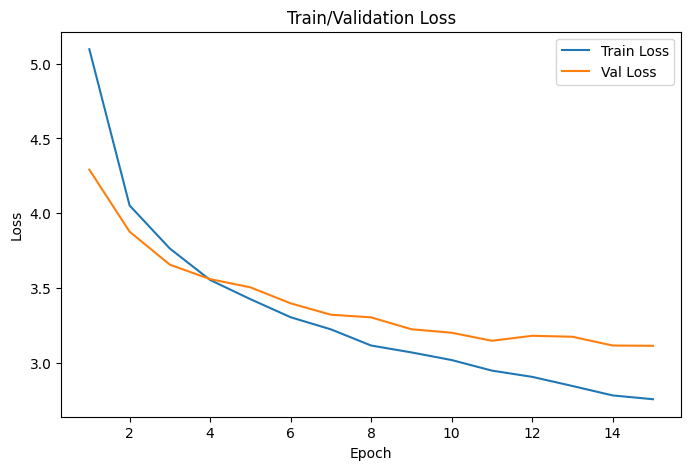

[INFO] Transformer training completed.


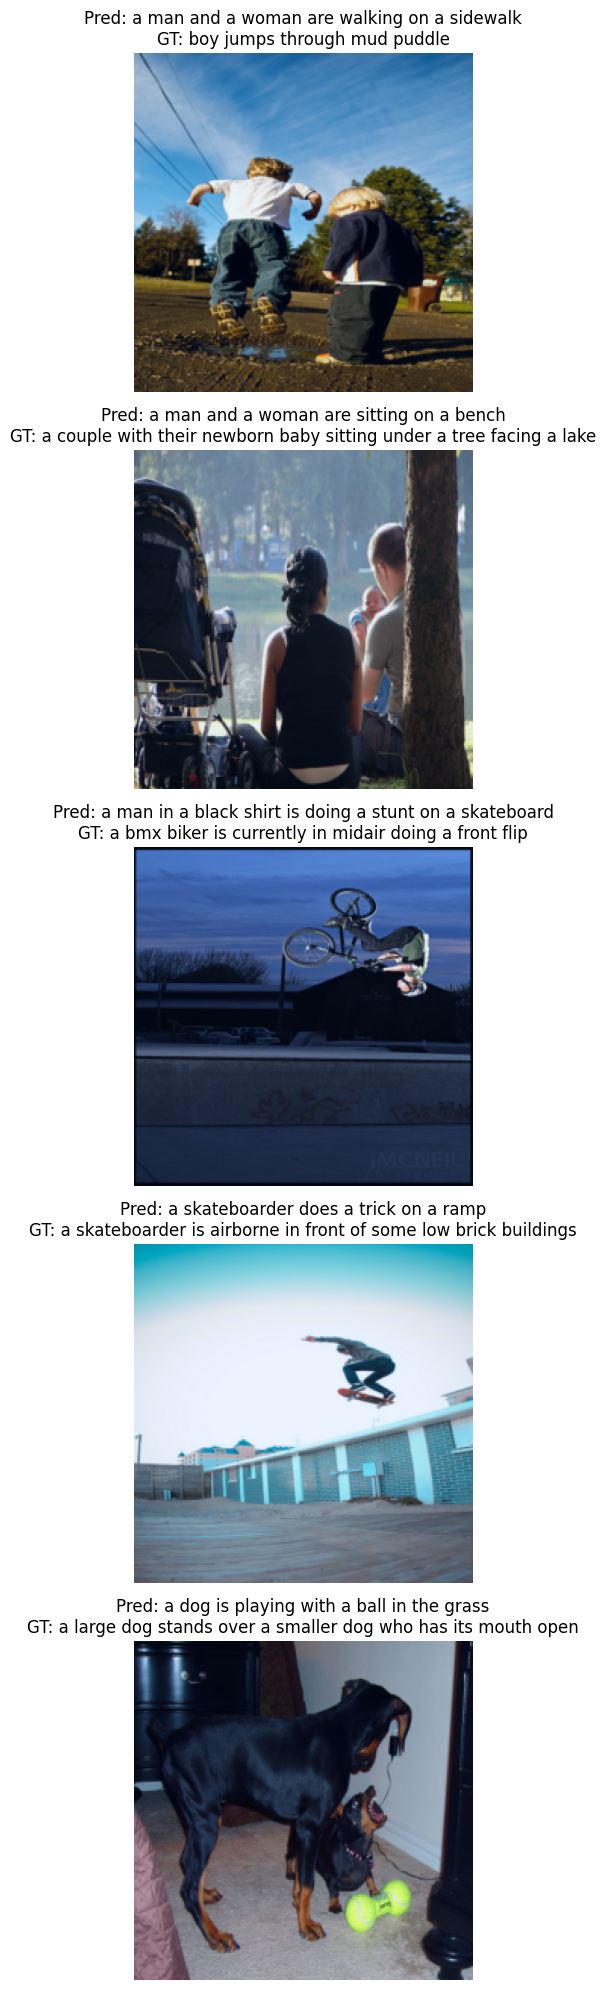

[INFO] Showing 5 sample predictions from test set.

[INFO] Evaluation on Validation dataset:
BLEU-1: 0.3760 | BLEU-2: 0.2157 | BLEU-3: 0.1253 | BLEU-4: 0.0696
ROUGE-L: 0.3741

[INFO] Evaluation on Test dataset:
BLEU-1: 0.3708 | BLEU-2: 0.2139 | BLEU-3: 0.1300 | BLEU-4: 0.0753
ROUGE-L: 0.3733
[INFO] All steps completed.
[TIME] 372.62 seconds total run time.


In [8]:
import os
import zipfile
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
import json
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer

start_time = time.time()

DATASET_PATH = "flickr8k_dataset"
IMAGES_PATH = os.path.join(DATASET_PATH, "Flicker8k_Dataset")
CAPTIONS_PATH = os.path.join(DATASET_PATH, "Flickr8k.token.txt")
FLICKR8K_IMAGES_URL = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip"
FLICKR8K_CAPTIONS_URL = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip"

os.makedirs(DATASET_PATH, exist_ok=True)
print("[INFO] Dataset directory created.")

images_zip_path = os.path.join(DATASET_PATH, "Flickr8k_Dataset.zip")
if not os.path.exists(IMAGES_PATH):
    print("[INFO] Downloading image dataset...")
    r = requests.get(FLICKR8K_IMAGES_URL, stream=True)
    with open(images_zip_path, "wb") as f:
        f.write(r.content)
    print("[INFO] Extracting image dataset...")
    with zipfile.ZipFile(images_zip_path, "r") as zip_ref:
        zip_ref.extractall(DATASET_PATH)
    os.remove(images_zip_path)
print("[INFO] Image dataset ready.")

captions_zip_path = os.path.join(DATASET_PATH, "Flickr8k_text.zip")
if not os.path.exists(CAPTIONS_PATH):
    print("[INFO] Downloading captions dataset...")
    r = requests.get(FLICKR8K_CAPTIONS_URL, stream=True)
    with open(captions_zip_path, "wb") as f:
        f.write(r.content)
    print("[INFO] Extracting captions dataset...")
    with zipfile.ZipFile(captions_zip_path, "r") as zip_ref:
        zip_ref.extractall(DATASET_PATH)
    os.remove(captions_zip_path)
print("[INFO] Captions dataset ready.")

captions_dict = {}
with open(CAPTIONS_PATH, "r") as f:
    lines = f.readlines()
    for line in lines[1:]:
        parts = line.strip().split("\t")
        image_name, caption = parts[0], parts[1]
        image_name = image_name.split("#")[0]
        if image_name not in captions_dict:
            captions_dict[image_name] = []
        captions_dict[image_name].append(caption)

captions_df = pd.DataFrame([(k, v) for k, v in captions_dict.items()], columns=["image", "captions"])
print("[INFO] Captions DataFrame created.")

def preprocess_image(image_path, target_size=(224, 224)):
    if not os.path.exists(image_path):
        return None
    transform_ = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ])
    image_ = Image.open(image_path).convert("RGB")
    return transform_(image_)

def preprocess_caption(caption):
    caption = caption.lower()
    caption = re.sub(r'[^a-z\s]', '', caption)
    return caption

captions_df["preprocessed_images"] = captions_df["image"].apply(lambda x: preprocess_image(os.path.join(IMAGES_PATH, x)))
captions_df = captions_df.dropna(subset=["preprocessed_images"])
captions_df["cleaned_captions"] = captions_df["captions"].apply(lambda caps: [preprocess_caption(c) for c in caps])

vocab = {"<pad>":0, "<sos>":1, "<eos>":2, "<unk>":3}
w_i = 4
for cset in captions_df["cleaned_captions"]:
    for c in cset:
        for w in c.split():
            if w not in vocab:
                vocab[w] = w_i
                w_i += 1

max_len = 15
def tokenize(caption):
    t = [vocab.get(w, vocab["<unk>"]) for w in caption.split()]
    t = [vocab["<sos>"]] + t + [vocab["<eos>"]]
    if len(t) < max_len:
        t += [vocab["<pad>"]] * (max_len - len(t))
    return t[:max_len]

captions_df["tokenized_captions"] = captions_df["cleaned_captions"].apply(lambda caps: [tokenize(c) for c in caps])
print("[INFO] Captions tokenized and padded.")

unique_imgs = captions_df["preprocessed_images"].unique()
train_imgs, temp_imgs = train_test_split(unique_imgs, test_size=0.2, random_state=42)
val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)
train_df = captions_df[captions_df["preprocessed_images"].isin(train_imgs)]
val_df = captions_df[captions_df["preprocessed_images"].isin(val_imgs)]
test_df = captions_df[captions_df["preprocessed_images"].isin(test_imgs)]
print(f"[INFO] Dataset split: Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}")

class FlickrDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = row.preprocessed_images
        if self.transform:
            img = self.transform(img)
        cap = torch.tensor(random.choice(row.tokenized_captions), dtype=torch.long)
        return img, cap

aug_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8,1.0))
])
train_data = FlickrDataset(train_df, transform=aug_transform)
val_data = FlickrDataset(val_df, transform=None)
test_data = FlickrDataset(test_df, transform=None)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("[INFO] DataLoader created.")

class EfficientNetEncoder(nn.Module):
    def __init__(self, output_dim=512):
        super().__init__()
        effnet = models.efficientnet_b0(pretrained=True)
        for param in effnet.parameters():
            param.requires_grad = False
        effnet.classifier = nn.Identity()
        self.backbone = effnet
        self.linear = nn.Linear(1280, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        with torch.no_grad():
            features = self.backbone(x)      
        feats = self.linear(features)       
        feats = self.relu(feats)
        return feats.unsqueeze(1)         

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=100):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(1))  # (max_len,1,d_model)
    def forward(self, x):
        seq_len = x.size(0)  
        return x + self.pe[:seq_len, :]  

def generate_subsequent_mask(sz):
    return torch.triu(torch.ones(sz, sz), diagonal=1).bool()

class TransformerDecoder(nn.Module):
    def __init__(self, vocab_size, d_model=512, nhead=8, num_layers=4, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, max_len=100)

        decoder_layer = nn.TransformerDecoderLayer(d_model=d_model,
                                                   nhead=nhead,
                                                   dim_feedforward=2048,
                                                   dropout=dropout)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(d_model, vocab_size)

    def forward(self, enc_out, tgt):
        B, T = tgt.shape
        tgt_emb = self.embedding(tgt)       
        tgt_emb = tgt_emb.permute(1,0,2)     
        tgt_emb = self.pos_encoding(tgt_emb) 

        causal_mask = generate_subsequent_mask(T).to(tgt.device)
        enc_out = enc_out.permute(1,0,2)     
        dec_out = self.transformer_decoder(tgt_emb, enc_out, tgt_mask=causal_mask)  
        dec_out = dec_out.permute(1,0,2)    
        logits = self.fc_out(dec_out)        
        return logits

class CNN_Transformer(nn.Module):
    def __init__(self, vocab_size, d_model=512, nhead=8, num_layers=4):
        super().__init__()
        self.encoder = EfficientNetEncoder(output_dim=d_model)
        self.decoder = TransformerDecoder(vocab_size=vocab_size,
                                          d_model=d_model,
                                          nhead=nhead,
                                          num_layers=num_layers)
    def forward(self, images, captions):
        enc_out = self.encoder(images)            # (B,1,d_model)
        dec_out = self.decoder(enc_out, captions) # (B,T,vocab_size)
        return dec_out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_Transformer(vocab_size=len(vocab), d_model=512, nhead=8, num_layers=4).to(device)
print("[INFO] Model created on device:", device)

criterion = nn.CrossEntropyLoss(ignore_index=vocab["<pad>"])
optimizer = optim.Adam(model.parameters(), lr=0.0001)

def evaluate(model, loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for imgs, caps in loader:
            imgs, caps = imgs.to(device), caps.to(device)
            logits = model(imgs, caps[:, :-1])  
            B, T, V = logits.shape
            logits = logits.view(-1, V)
            targets = caps[:, 1:].contiguous().view(-1)
            loss = criterion(logits, targets)
            total_loss += loss.item()
    return total_loss / len(loader)

epochs = 15
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]")
    for imgs, caps in loop:
        imgs, caps = imgs.to(device), caps.to(device)
        
        optimizer.zero_grad()
        logits = model(imgs, caps[:, :-1])  # (B,T,vocab_size)
        B, T, V = logits.shape
        logits = logits.view(-1, V)
        targets = caps[:, 1:].contiguous().view(-1)
        
        loss = criterion(logits, targets)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    train_loss = epoch_loss / len(train_loader)
    val_loss = evaluate(model, val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train/Validation Loss')
plt.legend()
plt.show()
print("[INFO] Transformer training completed.")


def decode_caption(tensor_caption):
    idx_to_word_map = {v: k for k, v in vocab.items()}
    words = []
    for idx in tensor_caption:
        if idx == vocab["<sos>"] or idx == vocab["<pad>"]:
            continue
        if idx == vocab["<eos>"]:
            break
        words.append(idx_to_word_map.get(idx.item(), "<unk>"))
    return " ".join(words)

test_dataset = FlickrDataset(test_df)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

fig, axes = plt.subplots(5, 1, figsize=(8, 20))
sample_indices = random.sample(range(len(test_dataset)), 5)

model.eval()
for i, idx_ in enumerate(sample_indices):
    img_tensor, real_cap = test_dataset[idx_]  
    gt_sentence = decode_caption(real_cap)
    
    img_np = img_tensor.permute(1,2,0).numpy()
    img_np = (img_np - img_np.min())/(img_np.max()-img_np.min())
    axes[i].imshow(img_np)
    axes[i].axis("off")

    image_batch = img_tensor.unsqueeze(0).to(device)  
    enc_out = model.encoder(image_batch)             

    predicted_words = []
    prev_word = torch.tensor([[vocab["<sos>"]]], dtype=torch.long).to(device)
    caption_temp = prev_word.clone()

    for t in range(max_len):
        if t > 0:
            caption_temp = torch.cat([caption_temp, prev_word], dim=1)  

        with torch.no_grad():
            logits = model.decoder(enc_out, caption_temp)      
            out_t = logits[:, -1, :]                          
            _, pred_idx = out_t.max(dim=1)                     

        word_idx = pred_idx.item()
        if word_idx == vocab["<eos>"]:
            break
        predicted_words.append(word_idx)
        prev_word = pred_idx.unsqueeze(1)  # (1,1)

    idx_to_word_map = {v: k for k, v in vocab.items()}
    pred_sentence = " ".join(idx_to_word_map[w] for w in predicted_words)

    axes[i].set_title(f"Pred: {pred_sentence}\nGT: {gt_sentence}", fontsize=12)

plt.tight_layout()
plt.show()
print("[INFO] Showing 5 sample predictions from test set.")

def clean_caption(tokenized_caption):
    idx_to_word_map = {v: k for k, v in vocab.items()}
    words = []
    for idx in tokenized_caption:
        if idx == vocab["<sos>"] or idx == vocab["<pad>"]:
            continue
        if idx == vocab["<eos>"]:
            break
        word = idx_to_word_map.get(idx, "<unk>")
        words.append(word)
    return words

def compute_bleu_scores(references, hypotheses):
    smoothie = SmoothingFunction().method1
    bleu1 = corpus_bleu(references, hypotheses, weights=(1.0, 0, 0, 0), smoothing_function=smoothie)
    bleu2 = corpus_bleu(references, hypotheses, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
    bleu3 = corpus_bleu(references, hypotheses, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smoothie)
    bleu4 = corpus_bleu(references, hypotheses, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)
    return bleu1, bleu2, bleu3, bleu4

def compute_rouge_scores(references, hypotheses):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    rouge_l_scores = []
    for ref, hyp in zip(references, hypotheses):
        r = " ".join(ref[0])
        h = " ".join(hyp)
        score = scorer.score(r, h)['rougeL'].fmeasure
        rouge_l_scores.append(score)
    return np.mean(rouge_l_scores)

def evaluate_model(model, loader, dataset_name):
    model.eval()
    references = []
    hypotheses = []
    with torch.no_grad():
        for images, captions in loader:
            images, captions = images.to(device), captions.to(device)
            logits = model(images, captions[:, :-1])
            preds = logits.argmax(dim=-1).cpu().tolist()
            refs = captions.cpu().tolist()
            for b in range(len(preds)):
                references.append([clean_caption(refs[b])])
                hypotheses.append(clean_caption(preds[b]))

    bleu1, bleu2, bleu3, bleu4 = compute_bleu_scores(references, hypotheses)
    rouge_l = compute_rouge_scores(references, hypotheses)
    
    print(f"\n[INFO] Evaluation on {dataset_name} dataset:")
    print(f"BLEU-1: {bleu1:.4f} | BLEU-2: {bleu2:.4f} | BLEU-3: {bleu3:.4f} | BLEU-4: {bleu4:.4f}")
    print(f"ROUGE-L: {rouge_l:.4f}")

evaluate_model(model, val_loader, "Validation")
evaluate_model(model, test_loader, "Test")

print("[INFO] All steps completed.")
print(f"[TIME] {time.time() - start_time:.2f} seconds total run time.")
